In [ ]:
# import dependencies
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
!python --version

Python 3.10.12


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

def load_split_data(csv_file, normalize=False, standardize=False):
  scale_indicator = []
  model_df = pd.read_csv(csv_file)

  # shuffle the data before splitting
  model_df = model_df.sample(frac=1)

  y = model_df['category'].copy()
  X = model_df.drop('category', axis=1).copy()

  if normalize:
    norm_indicator = "Normalized"
    scale_indicator.append(norm_indicator)
    X = preprocessing.normalize(X)
  elif standardize:
    stand_indicator = "Standardized"
    scale_indicator.append(stand_indicator)
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
  else:
    stand_indicator = "Unscaled"
  return X, y, scale_indicator

In [ ]:
def shuffle_feature_and_label():
  features = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Schizophrenia Classification Project/Features/relevant_timeseries_features.csv")
  labels = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Schizophrenia Classification Project/Data/labels.csv")
  features['labels'] = labels
  # shuffle the dataset
  shuffled_df = features.sample(frac=1).reset_index(drop=True)
  return shuffled_df

In [ ]:

model_data = "/content/drive/My Drive/Colab Notebooks/Schizophrenia Classification Project/Data/model_data.csv"
X, y, scale_indicator = load_split_data(model_data, standardize=True)
print(scale_indicator)

# shuffle the data before splitting
# df = shuffle_feature_and_label()



['Standardized']


In [ ]:
# extract X and y
# X = df.iloc[:, :-1]
# y = df['labels']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [ ]:
# Training

inputs = tf.keras.Input(shape=(X_train.shape[1]))
x = tf.keras.layers.Dense(256, activation='relu')(inputs)
x = tf.keras.layers.Dense(256, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

batch_size = 32
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/50
5/5 [==============================] - 2s 70ms/step - loss: 0.6516 - accuracy: 0.6103 - auc: 0.6651 - val_loss: 0.6269 - val_accuracy: 0.6286 - val_auc: 0.7319 - lr: 0.0010
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 0.5212 - accuracy: 0.7574 - auc: 0.8643 - val_loss: 0.6367 - val_accuracy: 0.6286 - val_auc: 0.7373 - lr: 0.0010
Epoch 3/50
5/5 [==============================] - 0s 12ms/step - loss: 0.4517 - accuracy: 0.8088 - auc: 0.9098 - val_loss: 0.6149 - val_accuracy: 0.6286 - val_auc: 0.7101 - lr: 0.0010
Epoch 4/50
5/5 [==============================] - 0s 11ms/step - loss: 0.3972 - accuracy: 0.8676 - auc: 0.9289 - val_loss: 0.6060 - val_accuracy: 0.6571 - val_auc: 0.7174 - lr: 0.0010
Epoch 5/50
5/5 [==============================] - 0s 11ms/step - loss: 0.3494 - accuracy: 0.8750 - auc: 0.9464 - val_loss: 0.6217 - val_accuracy: 0.6857 - val_auc: 0.7446 - lr: 0.0010
Epoch 6/50
5/5 [==============================] - 0s 17ms/step - loss: 0.3193 - 

<function matplotlib.pyplot.show(close=None, block=None)>

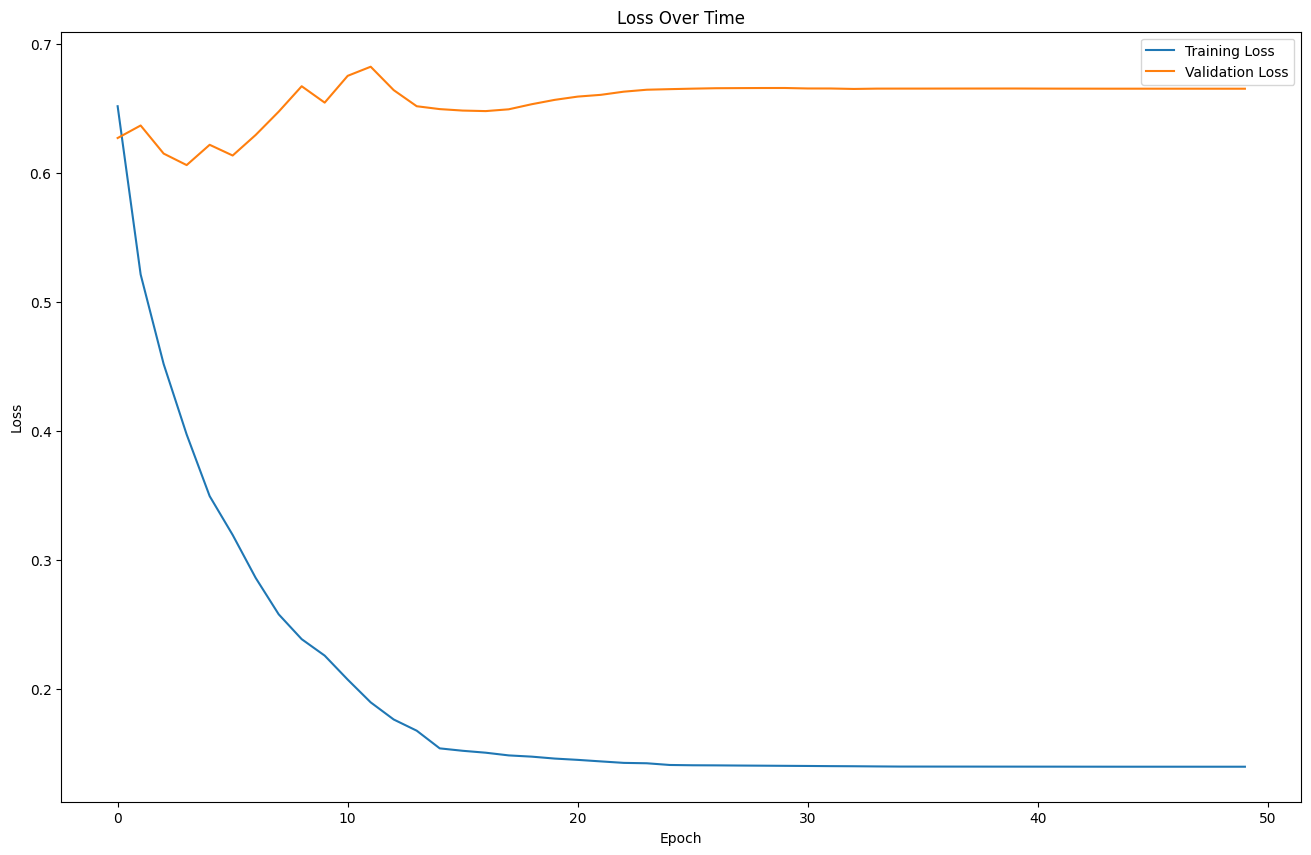

In [ ]:
plt.figure(figsize=(16,10))

plt.plot(range(epochs), history.history['loss'], label='Training Loss')
plt.plot(range(epochs), history.history['val_loss'], label='Validation Loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Time')
plt.legend()

plt.show

In [ ]:
results = model.evaluate(X_test, y_test)
acc = results[1]

3/3 [==============================] - 0s 6ms/step - loss: 0.4874 - accuracy: 0.8784 - auc: 0.8947


In [ ]:
y_true = np.array(y_test)

y_pred = np.squeeze(model.predict(X_test))
y_pred = np.array(y_pred >= 0.5, dtype=int)

3/3 [==============================] - 0s 4ms/step


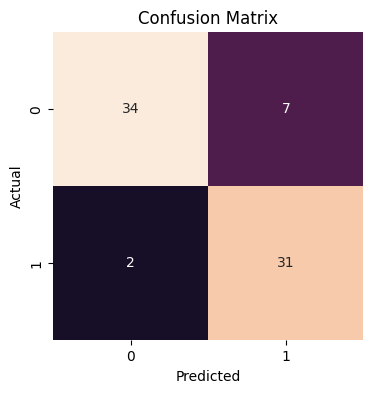

In [ ]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(4, 4))

sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

In [ ]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.88        41
           1       0.82      0.94      0.87        33

    accuracy                           0.88        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.89      0.88      0.88        74



In [ ]:
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 27)]              0         
                                                                 
 dense_15 (Dense)            (None, 256)               7168      
                                                                 
 dense_16 (Dense)            (None, 256)               65792     
                                                                 
 dense_17 (Dense)            (None, 1)                 257       
                                                                 
Total params: 73217 (286.00 KB)
Trainable params: 73217 (286.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.save(f"/content/drive/My Drive/Colab Notebooks/Schizophrenia Classification Project/Models/simplenn_{scale_indicator[0]}{acc*100}%.keras")
# model.save(f"/content/drive/My Drive/Colab Notebooks/Schizophrenia Classification Project/Models/simplenn_with_features{int(acc*100)}%.keras")

In [ ]:
results = model.evaluate(X_test, y_test)
type(results)

3/3 [==============================] - 0s 6ms/step - loss: 0.4874 - accuracy: 0.8784 - auc: 0.8947


list